In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()

print(f"Train dataset size: ")
print(f"train_seq_X: {len(train_seq_X)} train_seq_Y: {len(train_seq_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_seq_X: {len(valid_seq_X)} valid_seq_Y: {len(valid_seq_Y)}")

print()
print("Test dataset size: ")
print(f"test_seq_X: {len(test_seq_X)}")


Train dataset size: 
train_seq_X: 7080 train_seq_Y: 7080

Valid dataset size: 
valid_seq_X: 489 valid_seq_Y: 489

Test dataset size: 
test_seq_X: 2232


In [35]:
# Convert list to NumPy array
train_seq_X = np.array(train_seq_X)
# Convert list to NumPy array
valid_seq_X = np.array(valid_seq_X)

# Convert labels to numpy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

print(type(train_seq_X))
print(type(train_seq_X[0]))
# Convert list of strings (2D array) to a single string by flattening the array and joining all elements
all_characters = ''.join(train_seq_X.flatten())

# Get the unique characters
unique_characters = np.unique(list(all_characters))

print(f"Unique characters: {unique_characters}")
print(f"Number of unique characters: {len(unique_characters)}")
print(np.unique(valid_seq_Y))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
Unique characters: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of unique characters: 10
[0 1]


In [36]:
# Get unique characters for two digits
unique_characters = [f"{i:02d}" for i in range(100)]  # ['00', '01', ..., '99']
num_classes = len(unique_characters)  # 100 classes

# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}

# Function to convert input seqs to a 49x100 matrix using overlapping pairs
def one_hot_count_matrix(seq, max_len=50):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len - 1, num_classes))  # 49x100 matrix for overlapping pairs
    # Extract overlapping pairs and update the matrix
    for i in range(0, max_len - 1):  # Loop from seq[0:2] to seq[48:50]
        char_pair = seq[i:i + 2]  # Get overlapping pairs of characters
        if char_pair in char_to_index:
            index = char_to_index[char_pair]
            matrix[i, index] = 1  # One-hot encoding
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
X_train = np.array([one_hot_count_matrix(seq) for seq in train_seq_X])
X_valid = np.array([one_hot_count_matrix(seq) for seq in valid_seq_X])
X_test = np.array([one_hot_count_matrix(seq) for seq in test_seq_X])


print(X_train.shape)  # Expected shape: (N_train, 4900)
print(X_valid.shape)  # Expected shape: (N_valid, 4900)
print(X_test.shape) #Expected shape: (N_test, 4900)


(7080, 4900)
(489, 4900)
(2232, 4900)


# **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Train Accuracy with Logistic Regression: 0.9474576271186441
Validation Accuracy with Logistic Regression: 0.7402862985685071
F1 Score with Logistic Regression: 0.7401775047458308
Number of trainable parameters: 4901


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.999294             0.621677
1          40           0.993997             0.670757
2          60           0.974341             0.685072
3          80           0.960275             0.728016
4         100           0.947458             0.740286


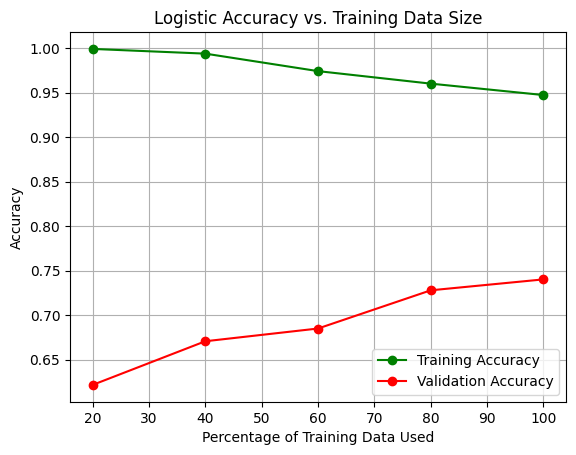

In [38]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# **KNN**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Train Accuracy with KNN: 0.7067796610169491
Validation Accuracy with KNN: 0.588957055214724
F1 Score with KNN Regression: 0.5887848697158423


# **LwP**

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_seq_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with LWP Regression: {f1}")

Train Accuracy with LWP: 0.6
Validation Accuracy with LWP: 0.5664621676891616
F1 Score with LWP Regression: 0.5660077178951286


# **SVM Classifier**

In [41]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_seq_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
train_accuracy = accuracy_score(train_seq_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

f1 = f1_score(valid_seq_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Train Accuracy with SVM: 0.9610169491525423
Validation Accuracy with SVM: 0.7423312883435583
F1 Score with SVM: 0.7420611908244631
Number of trainable parameters: 4901


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           1.000000             0.607362
1          40           0.999647             0.646217
2          60           0.988701             0.695297
3          80           0.974223             0.723926
4         100           0.961017             0.742331


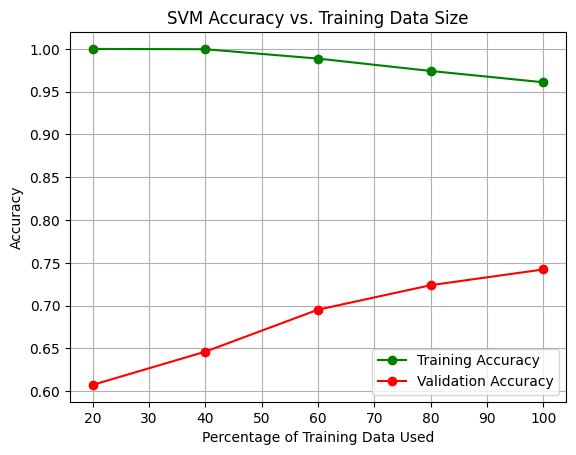

In [42]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_seq_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_seq_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_seq_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()